In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:20<00:00, 142MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
import zipfile
import os

In [ ]:
dataset_dir = path

In [ ]:
print("Dataset Contents", os.listdir(dataset_dir))

Dataset Contents ['New Plant Diseases Dataset(Augmented)', 'test', 'new plant diseases dataset(augmented)']


In [ ]:
import os

# Base dataset directory
dataset_dir = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

# Define paths
train_dir = os.path.join(dataset_dir, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "train")
validation_dir = os.path.join(dataset_dir, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "valid")
test_dir = os.path.join(dataset_dir, "test", "test")

# Verify paths
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)

Train directory: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Validation directory: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
Test directory: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test


In [ ]:
# Check if directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))
print("Test directory exists:", os.path.exists(test_dir))

Train directory exists: True
Validation directory exists: True
Test directory exists: True


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Use the correct path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,  # Use the correct path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9038 - loss: 0.3001 - val_accuracy: 0.9253 - val_loss: 0.2342
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 203s 65ms/step - accuracy: 0.9324 - loss: 0.2034 - val_accuracy: 0.9411 - val_loss: 0.1898
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9508 - loss: 0.1490 - val_accuracy: 0.9532 - val_loss: 0.1460
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.9616 - loss: 0.1145 - val_accuracy: 0.9615 - val_loss: 0.1208
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9710 - loss: 0.0891 - val_accuracy: 0.9497 - val_loss: 0.1680
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 64ms/step - accuracy: 0.9752 - loss: 0.0754 - val_accuracy: 0.9554 - val_loss: 0.1471
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9787 - loss: 0.0661 - val_accuracy: 0.9619 - val_loss: 0.1269
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 

In [ ]:
cnn.save('plant_disease_prediction_model.keras')

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
categories = tf.argmax(y_pred,axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)  # This is already a 1D tensor
y_true = true_categories.numpy()  # Convert to NumPy if needed

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_true

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [ ]:
accuracy_score(y_true,categories)

0.9637491463692238

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    image_size=(128,128),
    batch_size=32,
    shuffle=False
)

Found 33 files.


In [ ]:
predictions = cnn.predict(test_data)  # This gives raw logits/probabilities
predicted_classes = tf.argmax(predictions, axis=1).numpy()  # Get class indices

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
predicted_classes

array([ 2,  2,  2, 28,  0,  0, 25,  8,  8,  8, 20, 20,  0, 20, 20, 22, 22,
       30, 29, 35, 29, 29, 29, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35])

In [ ]:
classes_names = training_set.class_names

In [ ]:
classes_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
Predicted_labels = [classes_names[i] for i in predicted_classes]

In [ ]:
Predicted_labels

['Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Tomato___Bacterial_spot',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Squash___Powdery_mildew',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Apple___Apple_scab',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___healthy',
 'Tomato___Late_blight',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [ ]:
history = training_history.history

In [ ]:
history

{'accuracy': [0.9145174026489258,
  0.9382601976394653,
  0.9540223479270935,
  0.9650046229362488,
  0.9716765284538269,
  0.9760864973068237,
  0.9797425270080566,
  0.9818336963653564,
  0.9837968349456787,
  0.9859164953231812],
 'loss': [0.26759690046310425,
  0.18755541741847992,
  0.14068399369716644,
  0.10635363310575485,
  0.08690889179706573,
  0.07410480827093124,
  0.06340456753969193,
  0.05615214630961418,
  0.05233548581600189,
  0.04510001093149185],
 'val_accuracy': [0.9252788424491882,
  0.9410994648933411,
  0.9532210230827332,
  0.9614728093147278,
  0.9496926665306091,
  0.9553835391998291,
  0.9619280695915222,
  0.9677327275276184,
  0.9731391072273254,
  0.9637491703033447],
 'val_loss': [0.23420032858848572,
  0.1898217350244522,
  0.1460374891757965,
  0.12083517014980316,
  0.16795529425144196,
  0.14705893397331238,
  0.12693718075752258,
  0.11584663391113281,
  0.09394741803407669,
  0.12373378127813339]}

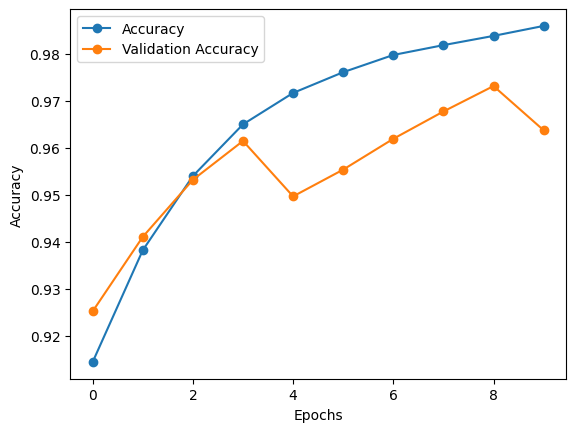

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'], label='Accuracy', marker='o')
plt.plot(history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
cm = confusion_matrix(y_true, categories)

In [ ]:
classification_report(y_true, categories, target_names=classes_names)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.93      0.97      0.95       504\n                                 Apple___Black_rot       0.98      0.98      0.98       497\n                          Apple___Cedar_apple_rust       0.98      0.93      0.95       440\n                                   Apple___healthy       0.98      0.95      0.97       502\n                               Blueberry___healthy       0.99      0.97      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       1.00      0.91      0.96       421\n                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.89      0.90       410\n                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.91      

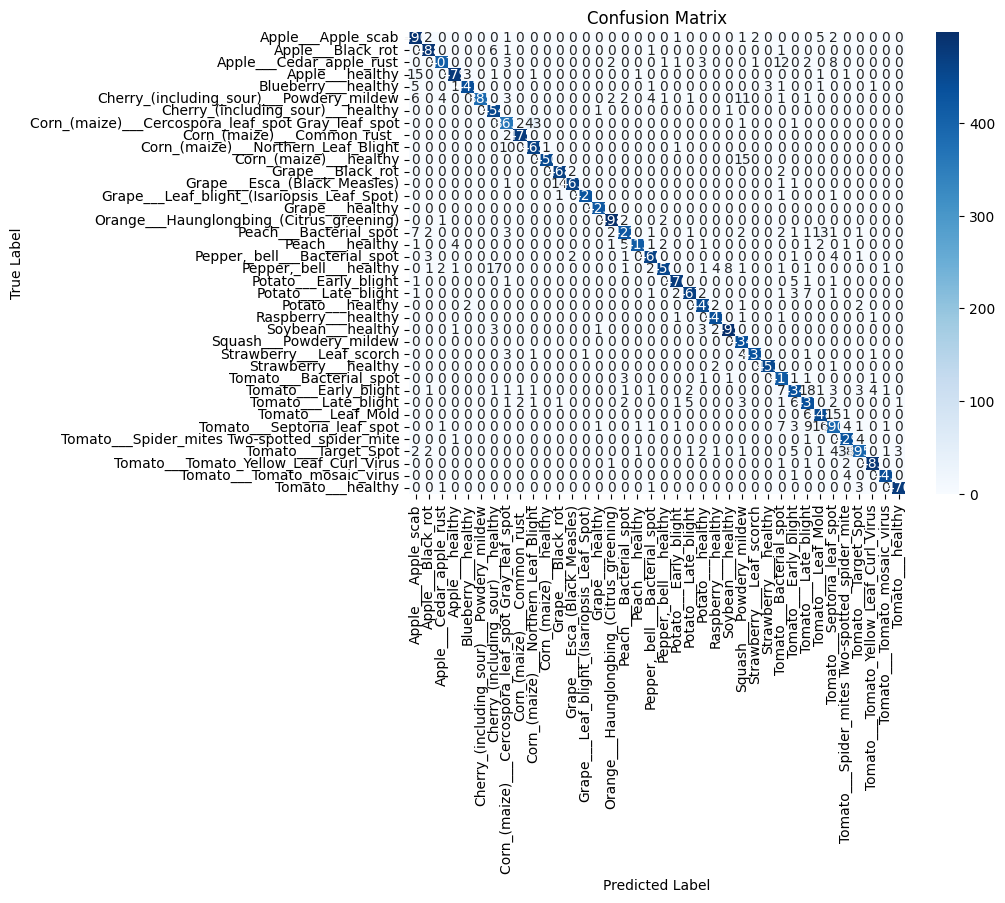

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
cnn.save('plant-disease-prediction-model.h5')

In [ ]:
from google.colab import files
files.download('plant-disease-prediction-model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>